![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/tripadvisor-cities/cities.xlsx


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
EXT_DATA_DIR = '/kaggle/input/tripadvisor-cities/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
df_cities = pd.read_excel(EXT_DATA_DIR+'cities.xlsx', header = None, index_col=0)
df_capital = pd.read_excel(EXT_DATA_DIR+'cities.xlsx', header = None, sheet_name = 1,index_col=0)
df_numres = pd.read_excel(EXT_DATA_DIR+'cities.xlsx', header = None, sheet_name = 2,index_col=0)
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

Тут видно, что у четырех признаков, один из которых числовой, есть пустые значения. Позже нам нужно будет их заполнить.

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
15887,id_1328,Munich,NaN,1340.0,NaN,15.0,"[['And now for something different ...', 'Top ...",/Restaurant_Review-g187309-d4148776-Reviews-An...,d4148776,1,4.5
8961,id_8961,Krakow,NaN,714.0,NaN,9.0,[['Brilliant little Burger bar - and spoke en....,/Restaurant_Review-g274772-d12341554-Reviews-B...,d12341554,0,0.0
1100,id_1100,London,"['American', 'Cafe', 'British']",6169.0,$$ - $$$,13.0,"[['Lovely breakfast.', 'Swish + Easy'], ['09/2...",/Restaurant_Review-g186338-d12288155-Reviews-S...,d12288155,0,0.0
865,id_865,Dublin,"['Contemporary', 'Healthy']",1730.0,$$ - $$$,11.0,"[['Food is fine but music very loud', 'Great C...",/Restaurant_Review-g186605-d12291291-Reviews-G...,d12291291,0,0.0
41461,id_2428,Stockholm,['International'],2432.0,NaN,3.0,[['Cook with the gourmet credentials opens ro....,/Restaurant_Review-g189852-d9461370-Reviews-Ma...,d9461370,1,2.5


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение целевого признака Rating

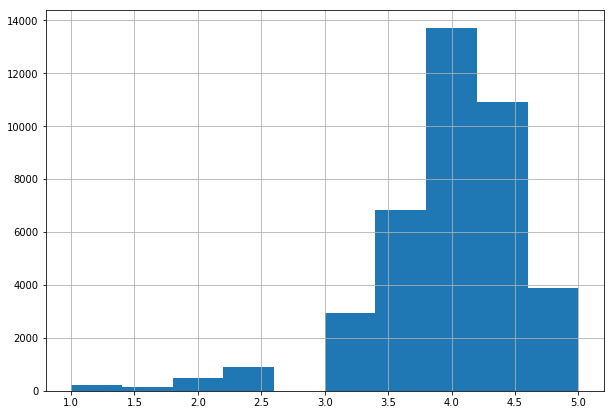

In [15]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Rating'].hist(bins=10)

Заметно, что распределение рейтинга похоже на нормальное, однако у диаграммы есть более длинный хвост слева из низких оценок

### Проверим некоторые признаки на наличие выбросов

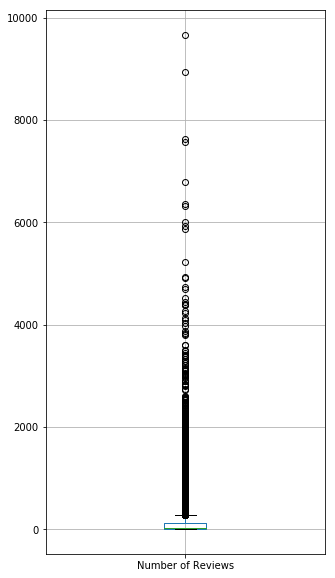

In [16]:
df_train.boxplot(column=['Number of Reviews'], figsize = (5,10))

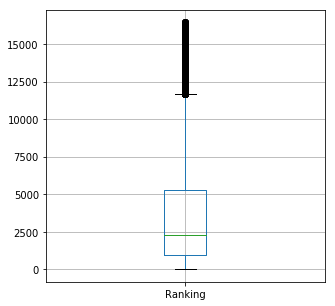

In [17]:
df_train.boxplot(column=['Ranking'], figsize = (5,5))

Заметно, что у признака "Количество отзывов" есть достаточно много выбросов. Однако по условиям задания нам все равно нельзя от них избавляться, поэтому просто зафиксируем этот факт.

# Feature Engineering

In [18]:
# Создаем словарь, ключом которого является название города, а значением количество населения в нем
# Информацию для словаря берем из заранее подготовленного файла
population = df_cities[1].to_dict()
population

{'Paris': 2148327,
 'Stockholm': 975904,
 'London': 8908081,
 'Berlin': 3644826,
 'Munich': 1424604,
 'Oporto': 287591,
 'Milan': 1337155,
 'Bratislava': 437723,
 'Vienna': 1897491,
 'Rome': 2870500,
 'Barcelona': 1611822,
 'Madrid': 3266126,
 'Dublin': 1173179,
 'Brussels': 168230,
 'Zurich': 402762,
 'Warsaw': 1790658,
 'Budapest': 1752286,
 'Copenhagen': 615993,
 'Amsterdam': 821752,
 'Lyon': 516092,
 'Hamburg': 1841179,
 'Lisbon': 505526,
 'Prague': 1272690,
 'Oslo': 634293,
 'Helsinki': 631695,
 'Edinburgh': 471650,
 'Geneva': 200548,
 'Ljubljana': 271885,
 'Athens': 664046,
 'Luxembourg': 116323,
 'Krakow': 1516000}

In [19]:
# Создаем словарь, ключом которого является название города, а значением число, которое показывает 
# является ли этот город столицей
is_capital = df_capital[1].to_dict()
is_capital

{'Paris': 1,
 'Stockholm': 1,
 'London': 1,
 'Berlin': 1,
 'Munich': 0,
 'Oporto': 0,
 'Milan': 0,
 'Bratislava': 1,
 'Vienna': 1,
 'Rome': 1,
 'Barcelona': 0,
 'Madrid': 1,
 'Dublin': 1,
 'Brussels': 1,
 'Zurich': 0,
 'Warsaw': 1,
 'Budapest': 1,
 'Copenhagen': 1,
 'Amsterdam': 1,
 'Lyon': 0,
 'Hamburg': 0,
 'Lisbon': 1,
 'Prague': 1,
 'Oslo': 1,
 'Helsinki': 1,
 'Edinburgh': 1,
 'Geneva': 0,
 'Ljubljana': 1,
 'Athens': 1,
 'Luxembourg': 1,
 'Krakow': 0}

In [20]:
# Создаем словарь, ключом которого является название города, а значением количество ресторанов в городе
numres = df_numres[1].to_dict()
numres

{'Paris': 17068,
 'Stockholm': 2908,
 'London': 19859,
 'Berlin': 6609,
 'Munich': 3139,
 'Oporto': 1982,
 'Milan': 7416,
 'Bratislava': 1263,
 'Vienna': 4110,
 'Rome': 10864,
 'Barcelona': 9459,
 'Madrid': 11092,
 'Dublin': 2324,
 'Brussels': 3606,
 'Zurich': 1861,
 'Warsaw': 3216,
 'Budapest': 3056,
 'Copenhagen': 2326,
 'Amsterdam': 3977,
 'Lyon': 2772,
 'Hamburg': 3275,
 'Lisbon': 4866,
 'Prague': 5393,
 'Oslo': 1257,
 'Helsinki': 1558,
 'Edinburgh': 1881,
 'Geneva': 1697,
 'Ljubljana': 600,
 'Athens': 2543,
 'Luxembourg': 736,
 'Krakow': 1748}

In [21]:
# Фунция добавляющая признак Population (население) в датафрейм
def addpop (city):    
    for key, value in population.items():
        if city == key:
            return value

In [22]:
data['Population'] = data['City'].apply(addpop)

In [23]:
# Фунция добавляющая признак Is Capital (столица или нет) в датафрейм
def addcapital(capital):
    for key, value in is_capital.items():
        if capital == key:
            return value

In [24]:
data['Is Capital'] = data['City'].apply(addcapital)

In [25]:
# Фунция добавляющая признак Restaurants Number (количество ресторанов в городе) в датафрейм
def addrestnum(city):
    for key, value in numres.items():
        if city == key:
            return value

In [26]:
data['Restaurant Number'] = data['City'].apply(addrestnum)

In [27]:
# Функция трансформирующая строку с перечнем доступных кухонь в список (list)
def strtolist (oneitem):
    mylist = []    
    if type(oneitem) == str:        
        onestr = oneitem[1:-1]        
        if ',' in onestr:
            types = onestr.split(', ')
            for cuistype in types:
                mylist.append(cuistype[1:-1])
        else:
            mylist.append(onestr[1:-1])
    return mylist

In [28]:
data['Cuisine List'] = data['Cuisine Style'].apply(strtolist)

In [29]:
# Добавляем признак количество доступных кухонь для каждого ресторана в датафрейме
data['Cuisine Count'] = data['Cuisine List'].apply(lambda x: len(x) if len(x) > 0 else 1)

In [30]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Population,Is Capital,Restaurant Number,Cuisine List,Cuisine Count
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,2148327,1,17068,"[Bar, Pub]",2
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,631695,1,1558,"[European, Scandinavian, Gluten Free Options, ...",5
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,471650,1,1881,[Vegetarian Friendly],1
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,8908081,1,19859,"[Italian, Mediterranean, European, Vegetarian ...",5
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,437723,1,1263,"[Italian, Mediterranean, European, Seafood, Ve...",6


In [31]:
data['Reviews'].fillna('[[], []]')

0                                                 [[], []]
1        [['Very good reviews!', 'Fine dining in Hakani...
2        [['Better than the Links', 'Ivy Black'], ['12/...
3        [['Most exquisite', 'Delicious and authentic']...
4        [['Always the best in bratislava', 'Very good ...
                               ...                        
49995    [['The real Italian experience!', 'Wonderful f...
49996    [['Parisian atmosphere', 'Bit pricey but inter...
49997    [['Good by swedish standards', 'A hidden jewel...
49998    [['Underground restaurant', 'Oldest Restaurant...
49999    [['Average', 'Nice an informal'], ['01/31/2016...
Name: Reviews, Length: 50000, dtype: object

In [32]:
data['Reviews']

0                                                 [[], []]
1        [['Very good reviews!', 'Fine dining in Hakani...
2        [['Better than the Links', 'Ivy Black'], ['12/...
3        [['Most exquisite', 'Delicious and authentic']...
4        [['Always the best in bratislava', 'Very good ...
                               ...                        
49995    [['The real Italian experience!', 'Wonderful f...
49996    [['Parisian atmosphere', 'Bit pricey but inter...
49997    [['Good by swedish standards', 'A hidden jewel...
49998    [['Underground restaurant', 'Oldest Restaurant...
49999    [['Average', 'Nice an informal'], ['01/31/2016...
Name: Reviews, Length: 50000, dtype: object

In [33]:
data.iloc[1]['Reviews']

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [34]:
# Получаем даты отзывов из признака Reviews
data['Reviews Date'] = data['Reviews'].apply(lambda x: x[-27:-3] if len(str(x)) > 27 else '[]')

In [35]:
# Функция для получения списка(list) с датами отзывов 
def datestolist (datestr):
    datelist = []
    if ',' in datestr:
        dates = datestr.split("', '")
        for onedate in dates:
            datelist.append(onedate)
    return datelist 

In [36]:
# Получаем отдельные даты отзывов из списка
data['Review Dates'] = data['Reviews Date'].apply(datestolist)

In [37]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Population,Is Capital,Restaurant Number,Cuisine List,Cuisine Count,Reviews Date,Review Dates
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,2148327,1,17068,"[Bar, Pub]",2,[],[]
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,631695,1,1558,"[European, Scandinavian, Gluten Free Options, ...",5,"12/05/2017', '10/29/2017","[12/05/2017, 10/29/2017]"
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,471650,1,1881,[Vegetarian Friendly],1,"12/28/2017', '12/06/2017","[12/28/2017, 12/06/2017]"
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,8908081,1,19859,"[Italian, Mediterranean, European, Vegetarian ...",5,"12/06/2017', '11/22/2017","[12/06/2017, 11/22/2017]"
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,437723,1,1263,"[Italian, Mediterranean, European, Seafood, Ve...",6,"02/08/2018', '01/24/2018","[02/08/2018, 01/24/2018]"


In [38]:
data['Review Dates'] = data['Review Dates'].apply(lambda x : None if len(x) < 2 else x)

In [39]:
data['Date1'] = data['Review Dates'].apply(lambda x: x[0] if x != None else x)
data['Date2'] = data['Review Dates'].apply(lambda x: x[1] if x != None else x)
data['Date1'] = data['Date1'].apply(lambda x: pd.to_datetime(x) if x != None else x)
data['Date2'] = data['Date2'].apply(lambda x: pd.to_datetime(x) if x != None else x)

In [40]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Population,Is Capital,Restaurant Number,Cuisine List,Cuisine Count,Reviews Date,Review Dates,Date1,Date2
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,2148327,1,17068,"[Bar, Pub]",2,[],None,NaT,NaT
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,631695,1,1558,"[European, Scandinavian, Gluten Free Options, ...",5,"12/05/2017', '10/29/2017","[12/05/2017, 10/29/2017]",2017-12-05,2017-10-29
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,471650,1,1881,[Vegetarian Friendly],1,"12/28/2017', '12/06/2017","[12/28/2017, 12/06/2017]",2017-12-28,2017-12-06
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,8908081,1,19859,"[Italian, Mediterranean, European, Vegetarian ...",5,"12/06/2017', '11/22/2017","[12/06/2017, 11/22/2017]",2017-12-06,2017-11-22
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,437723,1,1263,"[Italian, Mediterranean, European, Seafood, Ve...",6,"02/08/2018', '01/24/2018","[02/08/2018, 01/24/2018]",2018-02-08,2018-01-24


In [41]:
# Получаем текст отзывов из признака Reviews
data['Reviews Text'] = data['Reviews'].apply(lambda x: x[3: -33] if len(str(x)) > 27 else '[]')

In [42]:
# Вычисляем среднюю длину отзыва
data['Reviews Length'] = data['Reviews Text'].apply(lambda x: len(str(x))/2 if x != None else 0)

In [43]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Is Capital,Restaurant Number,Cuisine List,Cuisine Count,Reviews Date,Review Dates,Date1,Date2,Reviews Text,Reviews Length
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,1,17068,"[Bar, Pub]",2,[],None,NaT,NaT,[],1.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,1,1558,"[European, Scandinavian, Gluten Free Options, ...",5,"12/05/2017', '10/29/2017","[12/05/2017, 10/29/2017]",2017-12-05,2017-10-29,"Very good reviews!', 'Fine dining in Hakaniemi",23.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,1,1881,[Vegetarian Friendly],1,"12/28/2017', '12/06/2017","[12/28/2017, 12/06/2017]",2017-12-28,2017-12-06,"Better than the Links', 'Ivy Black",17.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,1,19859,"[Italian, Mediterranean, European, Vegetarian ...",5,"12/06/2017', '11/22/2017","[12/06/2017, 11/22/2017]",2017-12-06,2017-11-22,"Most exquisite', 'Delicious and authentic",20.5
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,1,1263,"[Italian, Mediterranean, European, Seafood, Ve...",6,"02/08/2018', '01/24/2018","[02/08/2018, 01/24/2018]",2018-02-08,2018-01-24,"Always the best in bratislava', 'Very good but...",26.5


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
Population           50000 non-null int64
Is Capital           50000 non-null int64
Restaurant Number    50000 non-null int64
Cuisine List         50000 non-null object
Cuisine Count        50000 non-null int64
Reviews Date         50000 non-null object
Review Dates         36206 non-null object
Date1                36206 non-null datetime64[ns]
Date2                36206 non-null datetime64[ns]
Reviews Text     

### Теперь посмотрим на корреляцию между всеми числовыми признаками, которые есть у нас в датафрейме

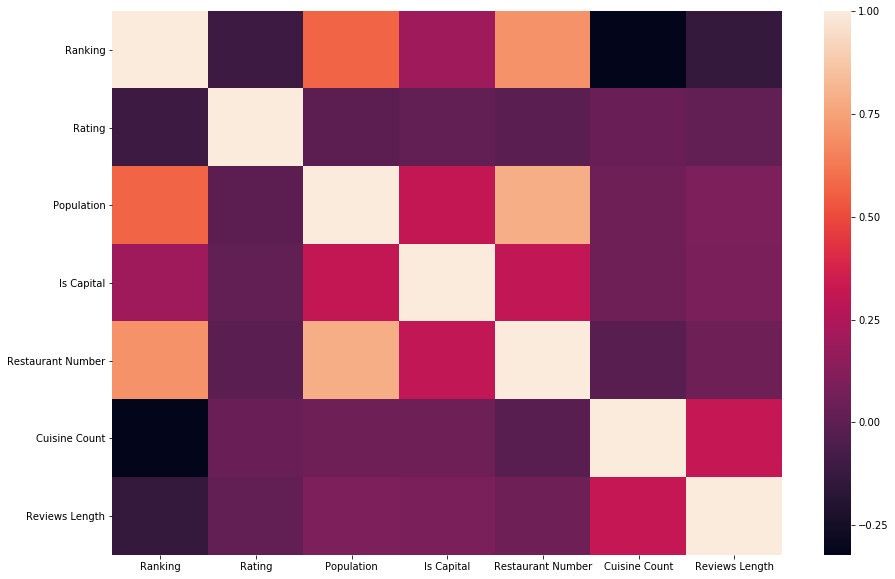

In [45]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['Restaurant_id', 'City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA', 'Cuisine List', 'Reviews Date', 'Review Dates', 'Date1', 'Date2', 'Reviews Text', 'sample'], axis=1).dropna(axis=1).corr(),)

In [46]:
corr = data.drop(['Restaurant_id', 'City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA', 'Cuisine List', 'Reviews Date', 'Review Dates', 'Date1', 'Date2', 'Reviews Text', 'sample'], axis = 1).dropna(axis=1).corr()

#cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr

,Ranking,Rating,Population,Is Capital,Restaurant Number,Cuisine Count,Reviews Length
Ranking,1.000000,-0.109897,0.566516,0.202905,0.702296,-0.322408,-0.136550
Rating,-0.109897,1.000000,-0.004614,0.010620,-0.011708,0.034506,0.011033
Population,0.566516,-0.004614,1.000000,0.311888,0.789952,0.048011,0.097646
Is Capital,0.202905,0.010620,0.311888,1.000000,0.307136,0.044637,0.090251
Restaurant Number,0.702296,-0.011708,0.789952,0.307136,1.000000,-0.014936,0.048128
Cuisine Count,-0.322408,0.034506,0.048011,0.044637,-0.014936,1.000000,0.315500
Reviews Length,-0.136550,0.011033,0.097646,0.090251,0.048128,0.315500,1.000000


График корреляции показывает, что есть достаточно большая обратная зависимость между рейтингом ресторанов по данным Tripadvisor и местом, которое занимает ресторан среди всех ресторанов своего города, что выглядит достаточно странно. Также есть хорошая прямая зависимость между рейтингом ресторана и количеством представленных в его ассортименте кухонь.

### Дополнительная обработка признаков

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [47]:
# применим One-Hot Encoding для признака City
one_hot_cities = pd.get_dummies(data['City'])
data = data.join(one_hot_cities) 

In [48]:
# применим One-Hot Encoding для признака Cuisine
s = pd.Series(data['Cuisine List'])
one_hot_cuisine = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0).fillna(0, downcast='infer')
all_cuis = list(one_hot_cuisine.columns)
data = data.join(one_hot_cuisine) 

In [49]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 


In [50]:
# Избавляемся от пустых значений
data['Number of Reviews'] = data['Number of Reviews'].fillna(0)
data['Reviews Interval'] = data['Number of Reviews'].fillna(0)
data[all_cuis] = data[all_cuis].fillna(0)

In [51]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan,Reviews Interval
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,162.0


# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [52]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_cities = pd.read_excel(EXT_DATA_DIR+'cities.xlsx', header = None, index_col=0)
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [53]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA', 'URL_TA'], axis = 1, inplace=True)
    
    # ################### 2. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    population = df_cities[1].to_dict()
    is_capital = df_capital[1].to_dict()
    numres = df_numres[1].to_dict()
    
    df_output['Population'] = df_output['City'].apply(addpop)
    df_output['Is Capital'] = df_output['City'].apply(addcapital)
    df_output['Restaurant Number'] = df_output['City'].apply(addrestnum)
    
    df_output['Cuisine List'] = df_output['Cuisine Style'].apply(strtolist)    
    df_output['Cuisine Count'] = df_output['Cuisine List'].apply(lambda x: len(x) if len(x) > 0 else 1)
    
    df_output['Reviews'].fillna('[[], []]')
    
    df_output['Reviews Date'] = df_output['Reviews'].apply(lambda x: x[-27:-3] if len(str(x)) > 27 else '[]')
    
    df_output['Review Dates'] = df_output['Reviews Date'].apply(datestolist)
    
    df_output['Review Dates'] = df_output['Review Dates'].apply(lambda x : None if len(x) < 2 else x)
    
    df_output['Date1'] = df_output['Review Dates'].apply(lambda x: x[0] if x != None else x)
    df_output['Date2'] = df_output['Review Dates'].apply(lambda x: x[1] if x != None else x)
    df_output['Date1'] = df_output['Date1'].apply(lambda x: pd.to_datetime(x) if x != None else x)
    df_output['Date2'] = df_output['Date2'].apply(lambda x: pd.to_datetime(x) if x != None else x)
    
    df_output['Reviews Text'] = df_output['Reviews'].apply(lambda x: x[3: -33] if len(str(x)) > 27 else '[]')
    df_output['Reviews Length'] = df_output['Reviews Text'].apply(lambda x: len(str(x))/2 if x != None else 0)         
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    # тут ваш код не Encoding фитчей   # ....    
    df_output = df_output.join(one_hot_cities)    
    df_output = df_output.join(one_hot_cuisine)
    
    
    # ################### 4. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    # тут ваш код по обработке NAN
    # ....
    
    df_output['Number of Reviews'] = df_output['Number of Reviews'].fillna(0)
    df_output['Reviews Interval'] = df_output['Number of Reviews'].fillna(0)
    df_output[all_cuis] = df_output[all_cuis].fillna(0)  
    
        
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    df_output.drop(['Date1', 'Date2'], axis = 1, inplace=True)
    
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

#### Запускаем и проверяем что получилось

In [54]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,Population,Is Capital,Restaurant Number,Cuisine Count,Reviews Length,Amsterdam,...,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan,Reviews Interval
6485,2103.0,17.0,0,0.0,1611822,0,9459,7,27.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
11220,12188.0,12.0,1,3.0,2148327,1,17068,1,26.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
6962,9756.0,12.0,0,0.0,8908081,1,19859,1,16.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
47349,1847.0,97.0,1,4.5,1611822,0,9459,6,15.0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0
38657,3287.0,8.0,1,4.5,3266126,1,11092,3,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
45368,5533.0,0.0,1,3.0,1337155,0,7416,1,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20218,1561.0,4.0,1,4.0,1173179,1,2324,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
5428,4478.0,8.0,0,0.0,3644826,1,6609,1,16.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
49278,6061.0,85.0,1,3.5,8908081,1,19859,3,27.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0
7649,720.0,89.0,0,0.0,631695,1,1558,3,24.5,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0


In [55]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 166 entries, Ranking to Reviews Interval
dtypes: float64(130), int64(5), uint8(31)
memory usage: 53.0 MB


In [56]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [57]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [58]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 165), (40000, 165), (40000, 164), (32000, 164), (8000, 164))

# Model 
Сам ML

In [59]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [60]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [61]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [62]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20806437500000002


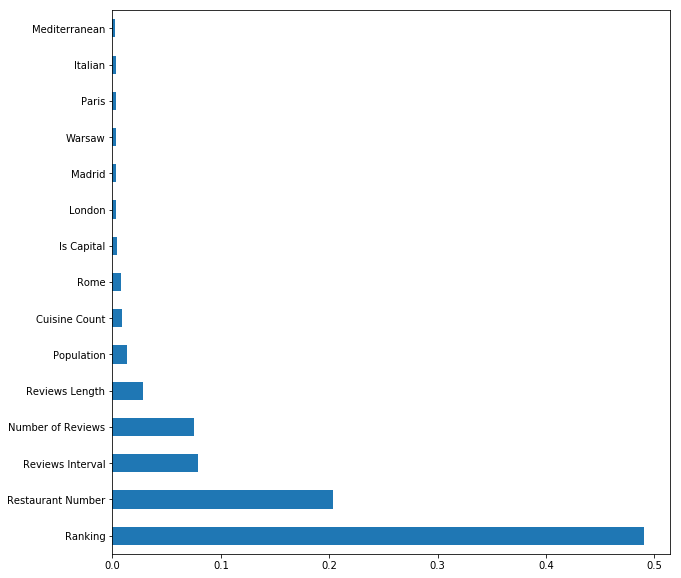

In [63]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [64]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Population,Is Capital,Restaurant Number,Cuisine Count,Reviews Length,Amsterdam,Athens,...,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan,Reviews Interval
1018,283.0,208.0,0.0,664046,1,2543,5,16.5,0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,208.0
8542,1184.0,42.0,0.0,505526,1,4866,1,15.5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
8923,1930.0,232.0,0.0,2148327,1,17068,5,32.5,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0
2157,228.0,277.0,0.0,516092,0,2772,5,16.0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,277.0
4616,822.0,7.0,0.0,634293,1,1257,1,24.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
6327,5591.0,34.0,0.0,8908081,1,19859,5,18.5,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
5865,228.0,46.0,0.0,975904,1,2908,4,32.5,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0
4016,2.0,281.0,0.0,1790658,1,3216,6,32.0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,281.0
6044,1464.0,17.0,0.0,975904,1,2908,2,42.5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
7587,740.0,254.0,0.0,1424604,0,3139,7,28.0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0


In [65]:
test_data = test_data.drop(['Rating'], axis=1)

In [66]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [67]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [68]:
predict_submission

array([2.995, 4.205, 4.565, ..., 3.03 , 4.5  , 4.305])

In [69]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,2.995
1,id_1,4.205
2,id_2,4.565
3,id_3,4.280
4,id_4,4.435
5,id_5,4.525
6,id_6,2.020
7,id_7,2.545
8,id_8,4.405
9,id_9,4.755


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
